<a href="https://colab.research.google.com/github/JesusCasas024/KNN-implementation/blob/main/U2_KNN_JECN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN algorithm (K-nearest neighbors)
This is a classifier algorithm used in supervised machine learning that uses proximity to make its predictions, it is normally used in classification problems but can work also for regression models. In classification problems the algorithm predicts the category of an individual point based on the major quantity of nearest neighbors around the point that are part of a stablished group. It means that having 2 groups around the point, the classification will be determined depending on the major number of nearest neighbors from a group, so if the main point has 3 nearest neighbors and two of them belong to the first group the algorithm will assupmt that the central point belongs to that category.

In the case of regression problems it is used the average of the k-nearest neighbors to make predictions.

#Pseudocode to apply KNN algorithm in classification


1. Import necessary libraries (scikit-learn, skimage, matplotlib, etc.)

2. Upload the dataset to Google Colab.

3. Extract the zip dataset and preprocess the images:
   - Use 'zipfile' library to extract the uploaded zip file.
   - Resize images to a standard size (128x128 pixels).
   - Flatten the 2D images to 1D arrays.

4. Split the preprocessed data into training and testing sets:
   - Use 'train_test_split' from scikit-learn to split images and labels into train and test sets.

5. Initialize and train the KNN classifier:
   - Initialize the KNN classifier (with stablished number of neighbors 'k').
   - Train the classifier with selected data (X_train, y_train).

6. Make predictions on the test data:
   - Use the trained KNN classifier to predict labels for test images (X_test).

7. Evaluate the model's performance:
   - Calculate accuracy using 'accuracy_score' from scikit-learn.
   - Visualize some of the classified images along with their actual and predicted labels using matplotlib.

8. Print and visualize the accuracy of the model.


# Application of KNN algorithm, Waste classifier

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving dataset-resized.zip to dataset-resized.zip


In [ ]:
import zipfile
import io
from skimage import io as skio
import os
import numpy as np

# Extract uploaded zip file
with zipfile.ZipFile(io.BytesIO(uploaded['dataset-resized.zip']), 'r') as zip_ref:
    zip_ref.extractall('dataset-resized')


In [ ]:
from skimage import transform
# Load and preprocess images
dataset_path = '/content/dataset-resized/dataset-resized'  #path of the file
categories = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

images = []
labels = []

for category_id, category in enumerate(categories):
    folder_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_name)
        img = skio.imread(img_path)
        img = transform.resize(img, (128, 128))  # Resize images to a standard size
        images.append(img.flatten())  # Flatten the 2D image to 1D array
        labels.append(category_id)

# Convert lists to NumPy arrays
images = np.array(images)
labels = np.array(labels)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.3, random_state=42)

# Initialize the KNN classifier with a stablished number of neighbors (K value)
k = 5
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Compile and train the classifier with the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the test data
predictions = knn_classifier.predict(X_test)

# Calculate accuracy and display the results
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.46


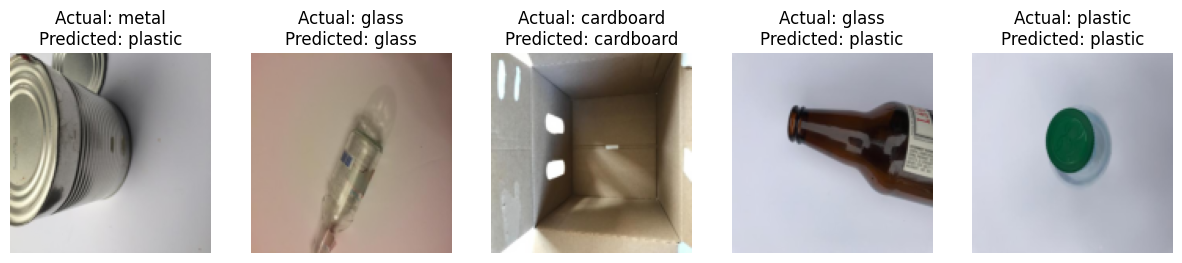

In [ ]:
import matplotlib.pyplot as plt
import random

# Test with some sample images
num_samples = 5  # Number of images to visualize
sample_indices = random.sample(range(len(X_test)), num_samples)
sample_images = X_test[sample_indices]
sample_labels_actual = y_test[sample_indices]
sample_labels_predicted = knn_classifier.predict(sample_images)

# Define class labels
class_labels = ["cardboard", "glass", "metal", "paper", "plastic", "trash"]

# Visualize the predicted and actual labels for the sample images
plt.figure(figsize=(15, 10))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i].reshape(128, 128, 3))
    plt.title(f'Actual: {class_labels[sample_labels_actual[i]]}\nPredicted: {class_labels[sample_labels_predicted[i]]}')
    plt.axis('off')

plt.show()


# Activation and loss functions
The activation function is what add non-linearity to the neural networks, this function is used in the different layers and neurons to work the complex relationships among the variables, so this activation function will modify the output of the neuron based on the previous input.

On the other hand, the loss function helps to calculate the error value of the model while realizing predictions or adjusting values to the training. So, it calculates how good or wrong was a prediction by getting the difference between actual and current values.
## Activation and Loss function in KNN algorithm
Because of the nature of the functions, the KNN algorithm doesn't have neither an activation function nor loss function since it bases its prediction from the majority vote of the quantity of nearest neihgbors and the distances from them to the central or main point. It also happens in the case of the loss function, it cannot be applied to the train of the model, the only metric that can be applied to see the rate of success of the algorithm is the accuracy, and there can be also plotted some samples from the test made in the model and let know if the current prediction was or not correct such as the example above.